# Hypothesis Testing

## 1. Hypothesis Definition 

We aim to evaluate whether there's a meaningful linear relationship between the unemployment rate and crime rate in the US.

- Null Hypothesis (H₀): There is no statistically significant correlation between unemployment rates and crime rates in the US.

- Alternative Hypothesis (H₁): There is a statistically significant correlation between unemployment rates and crime rates in the US.

This hypothesis will be tested using the Pearson correlation coefficient, focusing on both total crime rate and specific types of crime. If a significant correlation is found, it may guide the development of machine learning models to predict future crime trends based on unemployment levels.



## 2. Load Data

As done in the EDA, we reloaded and merged the yearly unemployment and crime datasets into a single DataFrame. This allows us to analyze trends and perform statistical tests at the national level, aggregated by year.


In [1]:
import pandas as pd

# Load raw datasets
unemp_df = pd.read_csv("data/df_unemployment_rates.csv")
crime_df = pd.read_csv("data/state_crime.csv")

# Process Unemployment Data
unemp_df['date'] = pd.to_datetime(unemp_df['date'], errors='coerce')
unemp_df = unemp_df.dropna(subset=['date'])
unemp_df['Year'] = unemp_df['date'].dt.year
unemp_yearly = unemp_df.groupby('Year')['overall_rate'].mean().reset_index()
unemp_yearly.rename(columns={'overall_rate': 'UnemploymentRate'}, inplace=True)

# Process Crime Data
crime_yearly = crime_df.groupby('Year')[
    [
        'Data.Rates.Property.All', 'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
        'Data.Rates.Property.Motor', 'Data.Rates.Violent.All', 'Data.Rates.Violent.Assault',
        'Data.Rates.Violent.Murder', 'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery'
    ]
].mean().reset_index()

# Create TotalCrimeRate column
crime_yearly['TotalCrimeRate'] = (
    crime_yearly['Data.Rates.Property.All'] + crime_yearly['Data.Rates.Violent.All']
)

# Merge unemployment and crime data on Year
df = pd.merge(unemp_yearly, crime_yearly, on='Year')

# Confirm structure
print("Data Overview:")
print(df.head())
print("\nData Info:")
print(df.info())

Data Overview:
   Year  UnemploymentRate  Data.Rates.Property.All  \
0  1960          5.541667              1606.868627   
1  1961          6.691667              1619.341176   
2  1962          5.566667              1694.633333   
3  1963          5.641667              1826.776471   
4  1964          5.158333              1990.215686   

   Data.Rates.Property.Burglary  Data.Rates.Property.Larceny  \
0                    425.156863                  1016.752941   
1                    438.960784                  1012.933333   
2                    450.156863                  1064.111765   
3                    493.837255                  1135.247059   
4                    544.303922                  1230.288235   

   Data.Rates.Property.Motor  Data.Rates.Violent.All  \
0                 164.954902              115.768627   
1                 167.443137              113.776471   
2                 180.364706              115.488235   
3                 197.698039              121.80980

## 3. Exploratory Visualization Before Testing

Before applying the statistical test, it's important to visually explore the potential relationship between Unemployment Rate and Total Crime Rate which was also done in the EDA. This helps in assessing whether a linear correlation test like Pearson is appropriate.


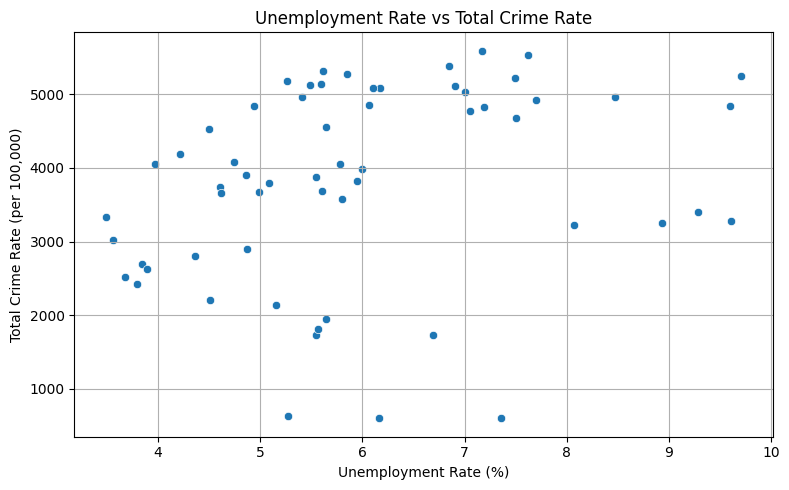

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simple scatter to preview relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['UnemploymentRate'], y=df['TotalCrimeRate'])
plt.title("Unemployment Rate vs Total Crime Rate")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Total Crime Rate (per 100,000)")
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Pearson Correlation Test (Statistical Test)

We compute the Pearson correlation coefficient (r) and the associated p-value between:

UnemploymentRate

TotalCrimeRate (sum of violent and property crime rates per 100,000 population)

Results:
Pearson Correlation Coefficient (r): 0.2762

p-value: 0.0327

Degrees of Freedom (df): 58

In [3]:
from scipy.stats import pearsonr

# Pearson test for unemployment vs total crime
r, p_value = pearsonr(df['UnemploymentRate'], df['TotalCrimeRate'])
n = df.shape[0]
dfree = n - 2

print(f"Pearson Correlation Coefficient (r): {r:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dfree}")

Pearson Correlation Coefficient (r): 0.2762
p-value: 0.0327
Degrees of Freedom: 58


## 5. Interpretation

The positive correlation (r ≈ 0.28) suggests a weak but statistically significant linear relationship between unemployment and total crime rate.

The p-value of 0.0327 is below the significance level of α = 0.05, so we reject the null hypothesis.

This means that changes in unemployment rates are statistically associated with changes in crime rates over the years analyzed, although the strength of the relationship is modest.
